Import necessary libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Load the datasets and preview the data

In [59]:
regions = pd.read_csv("data/regions.csv")
regions

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5
5,Житомирська,Житомир,Zhytomyr,Житомирщина,6
6,Закарпатська,Ужгород,Uzhgorod,Закарпаття,7
7,Запорізька,Запоріжжя,Zaporozhye,Запоріжжя,8
8,Івано-Франківська,Івано-Франківськ,Ivano-Frankivsk,Івано-Франківщина,9
9,Київська,Київ,Kyiv,Київщина,10


In [60]:
alarms = pd.read_csv("data/alarms-240222-010325.csv", delimiter=";")
alarms.head()

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19


From the preview, we can see that 'region_id' values in the alarms dataset do not directly match with those in the regions dataset.

We will need to standardize or map them before merging.

In [61]:
weather = pd.read_csv("data/all_weather_by_hour_2023-2025_v1.csv")
weather.head()

,city_latitude,city_longitude,city_resolvedAddress,city_address,city_timezone,city_tzoffset,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_solarenergy,hour_uvindex,hour_conditions,hour_icon,hour_source,hour_stations
0,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1020.0,0.0,91.5,0.0,NaN,0.0,Overcast,snow,obs,remote
1,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.2,88.2,0.0,NaN,0.0,Partially cloudy,fog,obs,remote
2,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1022.0,10.0,100.0,NaN,NaN,NaN,Overcast,cloudy,obs,33177099999
3,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.1,92.0,0.0,NaN,0.0,Overcast,fog,obs,remote
4,50.7469,25.3263,"Луцьк, Луцький район, Україна","Lutsk,Ukraine",Europe/Kiev,2.0,2022-02-24,1645653600,4.9,0.7,...,1021.0,0.0,93.8,0.0,NaN,0.0,Overcast,cloudy,obs,remote


# Analyze Data

## 1. Alarms Dataset

From the output of `alarms.info()`, we can see that there are **55,788 rows**, and all columns have the same number of **non-null** values, so there is no need to drop any rows due to missing data.

However, we also notice that the `start` and `end` columns are of type `object`, which means they are currently stored as strings. To work with time durations, we need to convert them to `datetime` format.

In [62]:
alarms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55788 entries, 0 to 55787
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           55788 non-null  int64 
 1   region_id    55788 non-null  int64 
 2   region_city  55788 non-null  object
 3   all_region   55788 non-null  int64 
 4   start        55788 non-null  object
 5   end          55788 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.6+ MB


Next, we convert the `start` and `end` columns to datetime format so that we can perform time-based operations.

We also create a new column called `duration_minutes`, which calculates the duration of each alarm in minutes. This format is more suitable for **visualizations** (even though using seconds could provide more precision for modeling).

In [63]:
alarms["start"] = pd.to_datetime(alarms["start"])
alarms["end"] = pd.to_datetime(alarms["end"])

alarms["duration_minutes"] = (alarms["end"] - alarms["start"]).dt.total_seconds() / 60

alarms.head()

,id,region_id,region_city,all_region,start,end,duration_minutes
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28,129.183333
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43,191.000000
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42,30.000000
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47,48.000000
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19,420.716667


In [64]:
alarms["region_city"].value_counts()

region_city
Донецька обл.             5886
Харківська обл.           5652
Запорізька обл.           5494
Дніпропетровська обл.     4966
Полтавська обл.           3499
Сумська обл.              3251
Миколаївська обл.         3123
Херсонська обл.           3031
Кіровоградська обл.       2913
Черкаська обл.            2119
Чернігівська обл.         2074
Одеська обл.              1937
Київська обл.             1654
Київ                      1552
Вінницька обл.            1373
Житомирська обл.          1334
Хмельницька обл.           968
Рівненська обл.            833
Тернопільська обл.         771
Волинська обл.             757
Івано-Франківська обл.     676
Львівська обл.             672
Чернівецька обл.           665
Закарпатська обл.          581
Крим                         7
Name: count, dtype: int64

In [65]:
alarms["region_id"].value_counts()

region_id
5     5886
19    5652
8     5494
4     4966
15    3499
17    3251
9     3206
13    3123
20    3031
10    2913
22    2119
23    2074
14    1937
3     1373
6     1334
21     968
16     833
18     771
2      757
24     676
12     672
1      665
7      581
25       7
Name: count, dtype: int64

We can see that **Kyiv** and **Kyivska oblast** (Kyiv region) share the same `region_id`, but they are listed as **separate entries** in the `region_city` column.

This is important to keep in mind during modeling.

### Describe Numerical Features

In [66]:
alarms.describe()

,id,region_id,all_region,start,end,duration_minutes
count,55788.000000,55788.000000,55788.000000,55788,55788,55788.000000
mean,109103.029935,12.178121,0.972180,2023-09-25 09:23:29.614648320,2023-09-25 10:36:17.500806400,72.798103
min,1.000000,1.000000,0.000000,2022-02-24 07:43:17,2022-02-24 09:52:28,-781.700000
25%,68259.750000,6.000000,1.000000,2022-12-11 12:10:05.750000128,2022-12-11 12:40:25.249999872,26.566667
50%,126918.500000,13.000000,1.000000,2023-10-31 19:11:42,2023-10-31 20:33:28,39.733333
75%,143399.250000,19.000000,1.000000,2024-06-24 11:41:12.249999872,2024-06-24 12:35:58.500000,84.716667
max,158665.000000,25.000000,1.000000,2025-03-01 23:26:07,2025-03-02 02:44:07,3031.300000
std,38574.559928,6.474089,0.164457,NaN,NaN,93.094316


From the statistics, we can see that a very large number of rows have `all_region` equal to 1.

We also notice a problem in the `duration_minutes` column — the minimum value is **-781**, which is not possible for duration. This suggests that there may be incorrect or misordered timestamps in the `start` and `end` columns. We need to investigate these cases further and correct or improve them.

Now let's look at the rows where `all_region` is equal to 0.


In [67]:
alarms[alarms["all_region"] == 0].head()

,id,region_id,region_city,all_region,start,end,duration_minutes
9,72852,9,Київ,0,2022-02-25 07:19:04,2022-02-25 07:49:04,30.0
39,72853,9,Київ,0,2022-02-26 11:24:04,2022-02-26 11:54:04,30.0
59,72854,9,Київ,0,2022-02-26 19:56:04,2022-02-26 20:26:04,30.0
62,72855,9,Київ,0,2022-02-26 20:58:04,2022-02-26 21:28:04,30.0
65,72856,9,Київ,0,2022-02-26 22:57:04,2022-02-26 23:27:04,30.0


As we can see, most of the region-specific alarms (`all_region == 0`) were triggered in **Kyiv**.

Let's now check if there are any other regions.


In [68]:
alarms[(alarms["all_region"] == 0) & (alarms["region_city"] != "Київ")]

,id,region_id,region_city,all_region,start,end,duration_minutes


In [69]:
alarms[(alarms["all_region"] == 1) & (alarms["region_city"] == "Київ")]

,id,region_id,region_city,all_region,start,end,duration_minutes


We checked two scenarios:
- When `all_region == 0` and the city is **not** Kyiv.
- When `all_region == 1` and the city **is** Kyiv.


And this means the `all_region` column does not provide additional value for modeling or analysis and can be safely dropped.

However, to maintain the distinction between **Kyiv** and **Kyivska oblast**, we will assign a new `region_id` for the oblast. Since the current maximum value in `region_id` is 25, we will assign **26** to Kyivska oblast.


In [70]:
alarms.loc[alarms["region_city"] == "Київська обл.", "region_id"] = 26
alarms.drop("all_region", axis=1, inplace=True)


Next, let's identify where the problem in `duration_minutes` occurred.

We will now look at the rows where `duration_minutes` is less than 0 to find and fix these issues.

In [71]:
alarms[alarms["duration_minutes"] < 0]

,id,region_id,region_city,start,end,duration_minutes
47970,150000,17,Сумська обл.,2024-10-01 20:53:04,2024-10-01 07:51:22,-781.7


We found that the issue with negative `duration_minutes` occurs in just **one case**.

Based on official information from [alarmmap.online](https://alarmmap.online/region/sumska-oblast/), we determined that the `end` time for this specific alarm was recorded incorrectly.

To fix it, we will update the `end` timestamp to the correct value: **2024-10-02 07:51:22**.


In [109]:
alarms.loc[alarms["id"] == 150000, "end"] = pd.to_datetime("2024-10-02 07:51:22")

alarms.loc[alarms["id"] == 150000, "duration_minutes"] = (
        (alarms.loc[alarms["id"] == 150000, "end"] - alarms.loc[
            alarms["id"] == 150000, "start"]).dt.total_seconds() / 60
)

alarms[alarms["id"] == 150000]

,id,region_id,region_city,start,end,duration_minutes,year,month
47970,150000,17,Сумська обл.,2024-10-01 20:53:04,2024-10-02 07:51:22,658.3,2024,10


In [73]:
alarms.describe()

,id,region_id,start,end,duration_minutes
count,55788.000000,55788.000000,55788,55788,55788.000000
mean,109103.029935,12.682136,2023-09-25 09:23:29.614648320,2023-09-25 10:36:19.049526528,72.823915
min,1.000000,1.000000,2022-02-24 07:43:17,2022-02-24 09:52:28,0.066667
25%,68259.750000,6.000000,2022-12-11 12:10:05.750000128,2022-12-11 12:40:25.249999872,26.566667
50%,126918.500000,13.000000,2023-10-31 19:11:42,2023-10-31 20:33:28,39.733333
75%,143399.250000,19.000000,2024-06-24 11:41:12.249999872,2024-06-24 12:35:58.500000,84.720833
max,158665.000000,26.000000,2025-03-01 23:26:07,2025-03-02 02:44:07,3031.300000
std,38574.559928,6.857442,NaN,NaN,93.057012


At this point, we have an optimized and cleaned version of the dataset. To further improve its quality for modeling, we can consider the following enhancements:

1. **Drop `region_city`**:
   Since we now have a reliable `region_id`, we can remove `region_city` to avoid redundancy.
   However, we must ensure that `region_id` values are treated as categorical, and that close numerical values do not imply geographical similarity during model training — unless we intentionally assign region IDs based on geographic logic, such as the **shortest distance to the aggressor's border** being represented with the **lowest index**.

2. **Add Additional Features**:
   Extract more time-based features such as `start_date`, `start_hour`, `day_of_week`, `month`, etc.


## Visual Exploration of the Data

Now let's visualize the alarms dataset to better understand it.


Before creating visualizations, we make a copy of the original dataset to ensure that any changes we apply do not affect the original `alarms` DataFrame.


In [74]:
alarms_copy = alarms.copy()

### Number of Alarms by Region

Now let's visualize how many alarms were triggered in each region.
This not only helps us identify which areas experienced more frequent alerts, but also serves as a basic check — if the numbers look too low or too high for certain regions, it might indicate issues with the data.


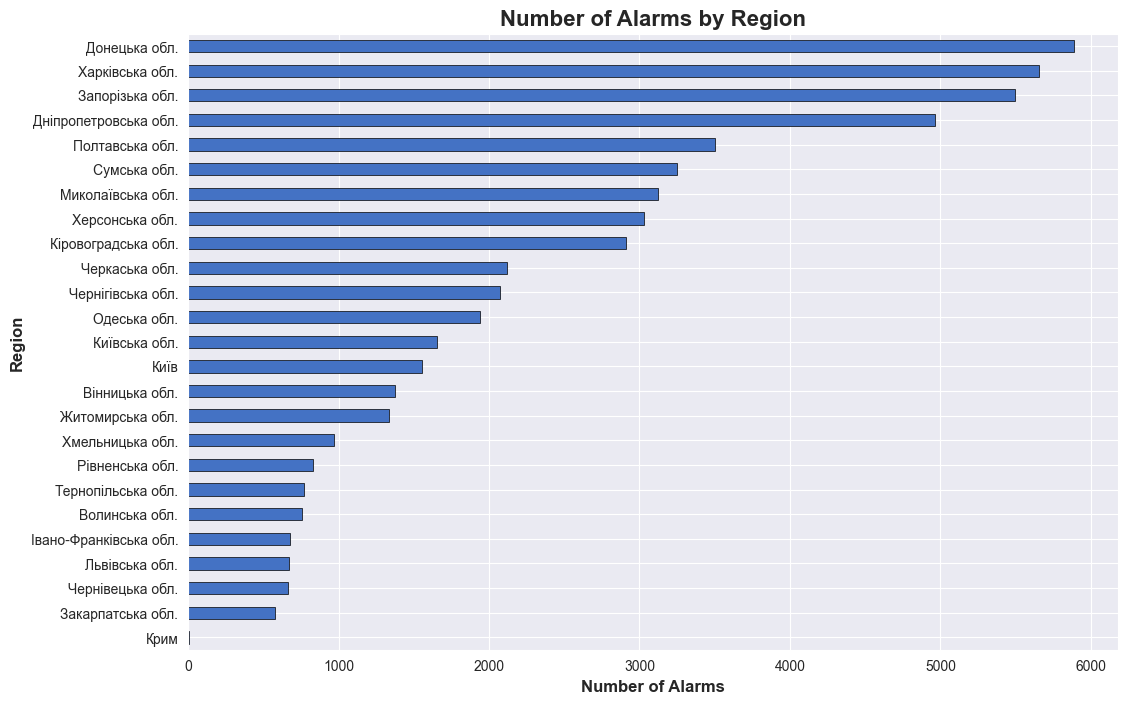

In [121]:
region_counts = alarms_copy["region_city"].value_counts().sort_values()
region_counts.plot(kind="barh", figsize=(12, 8), color="#4472C4", edgecolor="black", linewidth=0.5)
plt.xlabel("Number of Alarms", fontsize=12, fontweight="bold")
plt.ylabel("Region", fontsize=12, fontweight="bold")
plt.title("Number of Alarms by Region", fontsize=16, fontweight="bold");

From the graph, we can see that the distribution of alarms across regions appears quite realistic.
However, to validate the accuracy of our data, it's best to compare it with official sources.

One such source is [air-alarms.in.ua](https://air-alarms.in.ua/?from=2022-02-24&to=2025-03-01), where we can check the actual number of alerts per region during the selected time period.


### Total Alarm Duration by Region

In this plot, we visualize the **total duration** of air alarms (in minutes) aggregated by region.
This gives us additional insight beyond just the number of alarms.

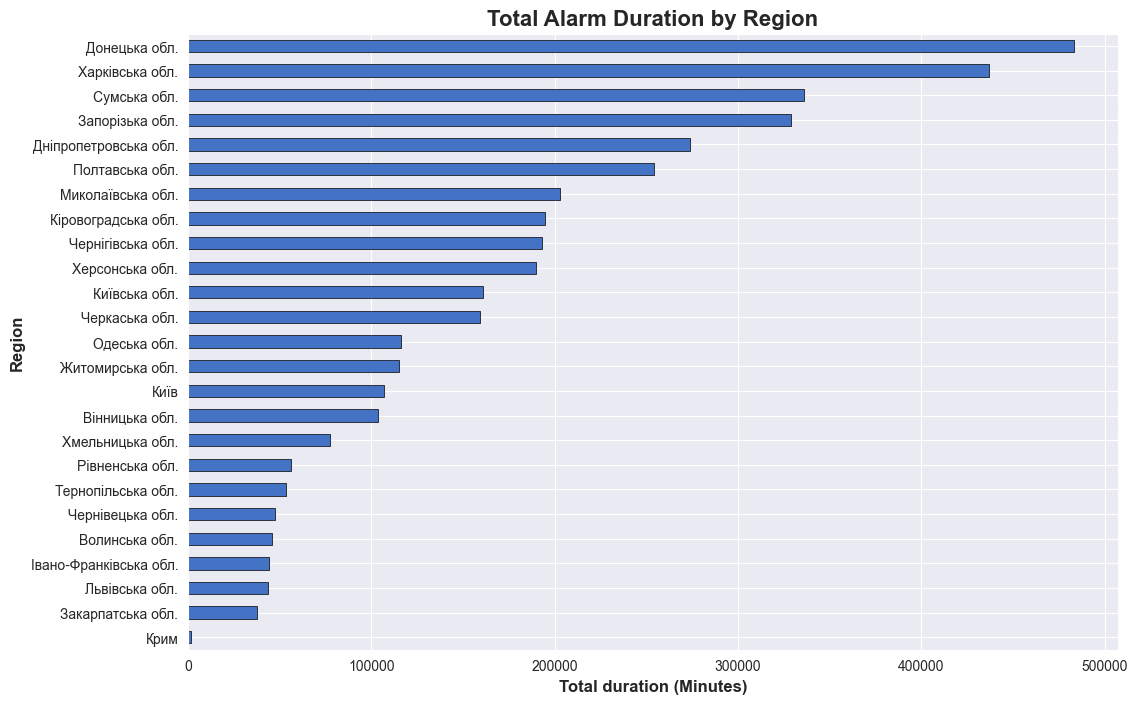

In [123]:
region_duration = alarms_copy.groupby("region_city")["duration_minutes"].sum().sort_values()
region_duration.plot(kind="barh", figsize=(12, 8), color="#4472C4", edgecolor="black", linewidth=0.5)
plt.xlabel("Total duration (Minutes)", fontsize=12, fontweight="bold")
plt.ylabel("Region", fontsize=12, fontweight="bold")
plt.title("Total Alarm Duration by Region", fontsize=16, fontweight="bold");

We can observe that the general pattern is similar to the previous chart based on the number of alarms.

### Average Alarm Duration by Region

This plot shows the average duration of individual air alarms in each region.
It helps us understand not just how often or how long alarms occurred in total, but the typical length of a single alert in each area.

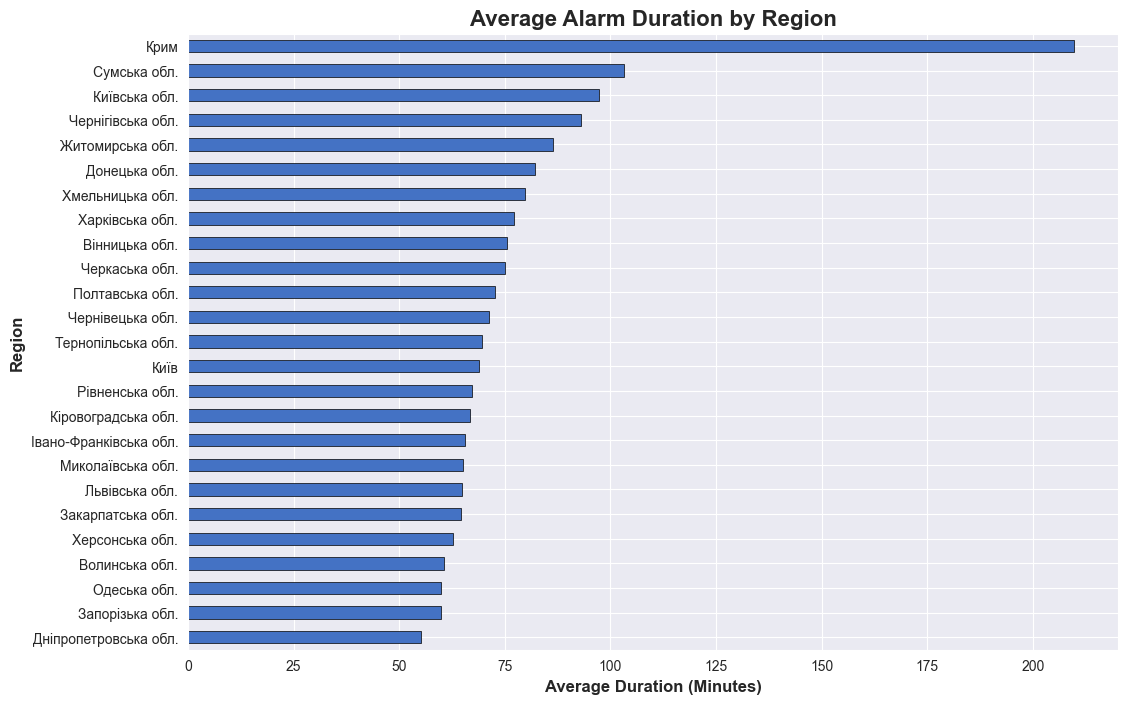

In [124]:
region_average = alarms_copy.groupby("region_city")["duration_minutes"].mean().sort_values()
region_average.plot(kind="barh", figsize=(12, 8), color="#4472C4", edgecolor="black", linewidth=0.5)
plt.xlabel("Average Duration (Minutes)", fontsize=12, fontweight='bold')
plt.ylabel("Region", fontsize=12, fontweight='bold')
plt.title("Average Alarm Duration by Region", fontsize=16, fontweight='bold');

We can already see a noticeable difference compared to the total number of alerts,
but we’ll highlight this more clearly in the next plot.


### Alarm Frequency vs Average Duration

This scatter plot displays each region as a dot positioned by:
- **Number of alarms** on the X-axis
- **Average alarm duration (minutes)** on the Y-axis

Each point is labeled with its corresponding region name.

This format helps us identify:
- Regions with **many frequent alarms but short durations**
- Regions with **fewer alarms but longer average durations**
- And those most severely affected in both frequency and duration

Note: Labels are still a bit dense in the central cluster. Some improvements could further enhance readability.

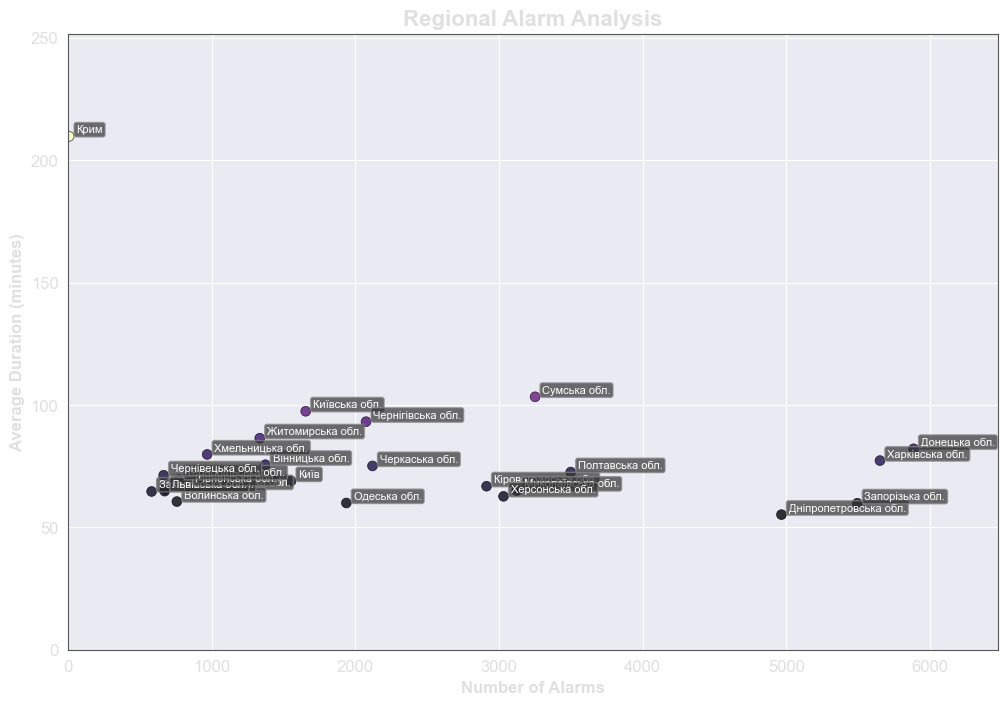

In [168]:
region_stats = alarms_copy.groupby("region_city").agg({
    "id": "count",
    "duration_minutes": "mean"
}).reset_index()
region_stats.columns = ["region_city", "count", "avg_duration"]

plt.figure(figsize=(12, 8))

plt.scatter(
    region_stats["count"],
    region_stats["avg_duration"],
    s=50,
    c=region_stats["avg_duration"],
    cmap="magma",
    alpha=0.8,
    edgecolors="black",
    linewidth=0.5
)

for _, row in region_stats.iterrows():
    plt.text(
        row["count"] + 50,
        row["avg_duration"] + 1.5,
        row["region_city"],
        fontsize=8,
        color="white",
        bbox=dict(boxstyle="round,pad=0.2", fc="#333333", ec="#888888", alpha=0.7)
    )

plt.xlabel("Number of Alarms", fontsize=12, fontweight="bold")
plt.ylabel("Average Duration (minutes)", fontsize=12, fontweight="bold")
plt.title("Regional Alarm Analysis", fontsize=16, fontweight="bold")

plt.xlim(0, region_stats["count"].max() * 1.1)
plt.ylim(0, region_stats["avg_duration"].max() * 1.2);

We can see that most regions are clustered in the lower-middle area, suggesting moderate alarm counts with average durations under 100 minutes.
However, a few regions stand out:
- **Crimea** has a significantly higher average duration despite a lower number of alarms.
- **Donetsk, Kharkiv, and Zaporizhzhia oblasts** show both high frequency and moderate-to-long average durations.
- **Sumy oblast** stands out with fewer alarms but a noticeably higher average duration.

### Distribution of Alarm Durations

This histogram shows the distribution of air alarm durations across all recorded events.

This visualization helps us understand how typical or extreme certain durations are, and whether the data is skewed.
It also gives a quick sense of whether short or long alarms were more common overall.


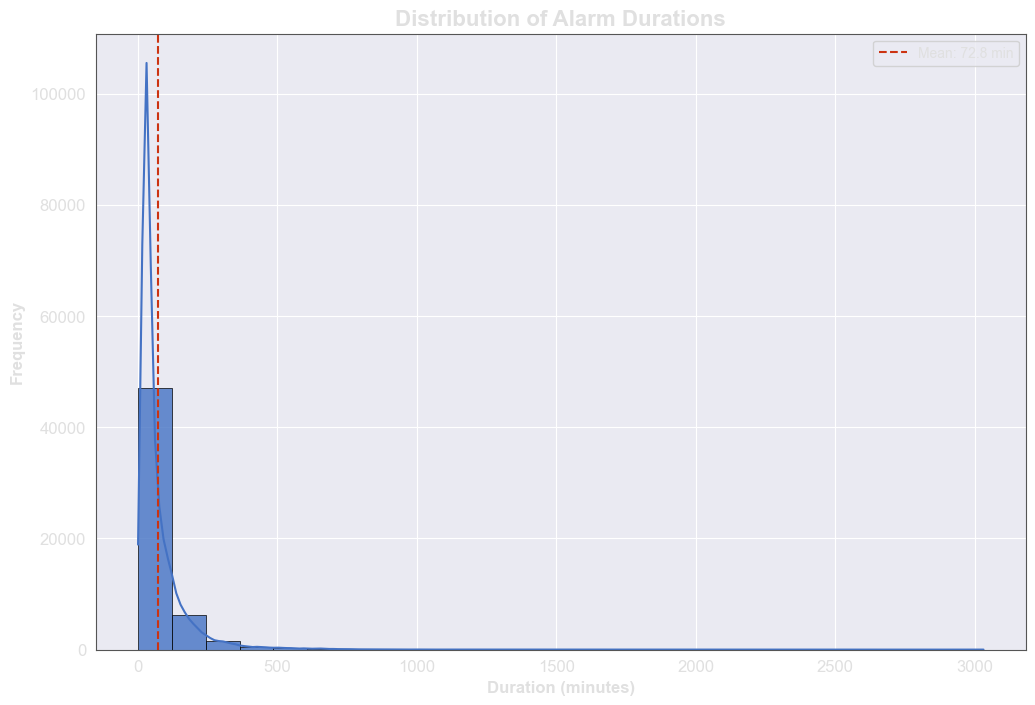

In [177]:
plt.figure(figsize=(12, 8))

ax = sns.histplot(
    alarms_copy["duration_minutes"],
    bins=25,
    kde=True,
    color="#4472C4",
    alpha=0.8,
    edgecolor="black",
    linewidth=0.5
)

mean_duration = alarms_copy["duration_minutes"].mean()
plt.axvline(mean_duration, color='#CC3311', linestyle='--', linewidth=1.5,
            label=f'Mean: {mean_duration:.1f} min')
plt.title("Distribution of Alarm Durations", fontsize=16, fontweight='bold')
plt.xlabel("Duration (minutes)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.legend(fontsize=10);

As we can see from the histogram, the distribution of alarm durations is right-skewed.
Most alarms last under 50 minutes, but there are a few extreme outliers that significantly increase the mean.

This suggests that the mean alone may not fully represent the typical duration.


### Alarm Frequency by Start Hour

This bar chart illustrates how frequently air alarms were triggered at different hours of the day, based on the `start` time of each alarm.


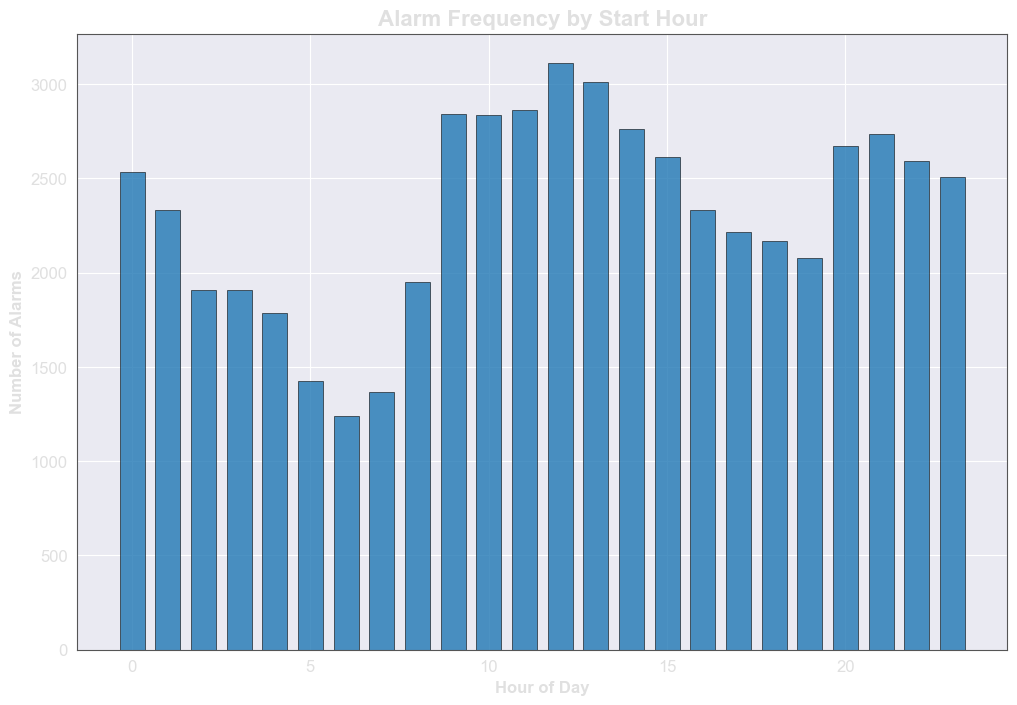

In [181]:
plt.figure(figsize=(12, 8))
alarms_copy["start_hour"] = alarms_copy["start"].dt.hour
hourly_counts=alarms_copy["start_hour"].value_counts().sort_index()
bars = plt.bar(
    hourly_counts.index,
    hourly_counts.values,
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)
plt.title("Alarm Frequency by Start Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Alarms", fontsize=12, fontweight='bold')
plt.xticks(rotation=0);

We can observe:
- A noticeable drop in alarms during early morning hours (especially around 4–6 AM).
- Alarm frequency increases significantly starting from **8–9 AM** and remains relatively high throughout the **daytime and evening**.
- The peak hours for alarm activations are between **11 AM and 2 PM**, indicating periods of highest alert activity.

### Alarm Frequency by Start Hour

Same plot but with end hour

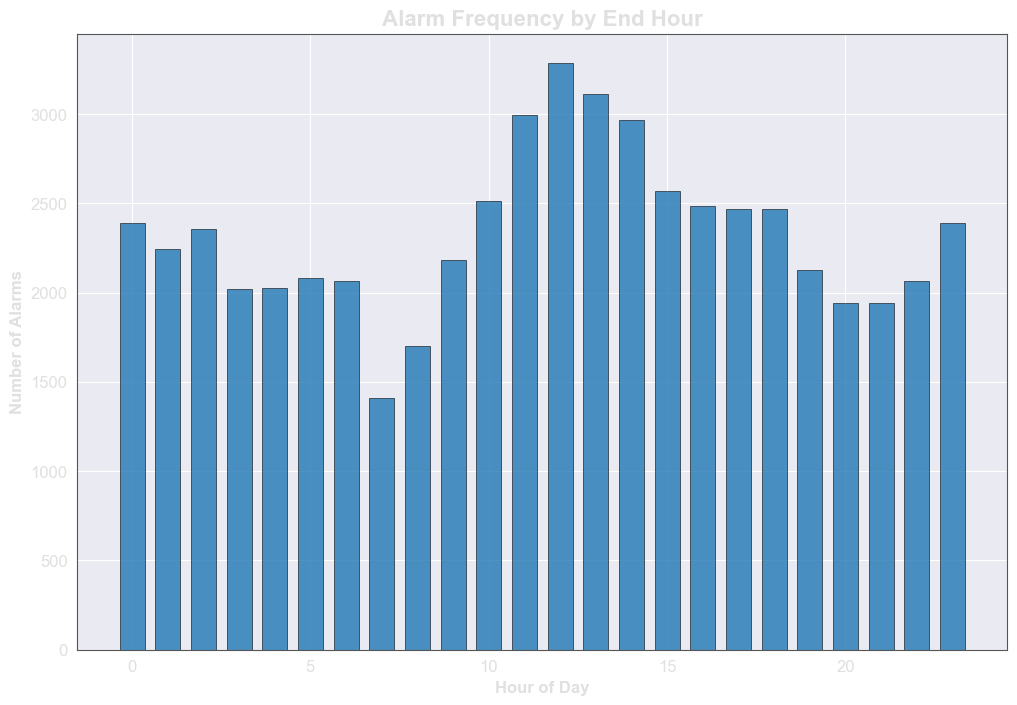

In [182]:
plt.figure(figsize=(12, 8))
alarms_copy["end_hour"] = alarms_copy["end"].dt.hour
hourly_counts=alarms_copy["end_hour"].value_counts().sort_index()
bars = plt.bar(
    hourly_counts.index,
    hourly_counts.values,
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)
plt.title("Alarm Frequency by End Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Number of Alarms", fontsize=12, fontweight='bold')
plt.xticks(rotation=0);

Same results.

### Alarm Frequency by Day of Week and Hour

This heatmap visualizes how air alarm activity varies across both the **day of the week** and the **hour of the day**.

Each cell represents the number of alarms triggered during a specific hour on a specific day.
Darker shades indicate higher frequencies, while lighter shades represent quieter periods.

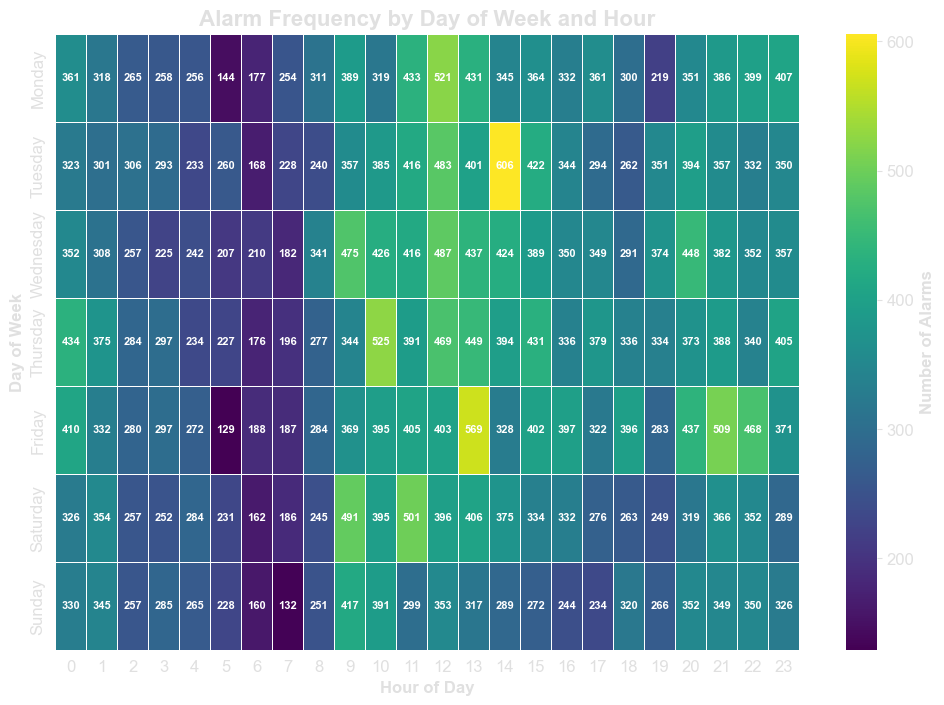

In [184]:
plt.figure(figsize=(12, 8))
alarms_copy["weekday"] = alarms_copy["start"].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = alarms_copy.groupby(["weekday", "start_hour"]).size().unstack().reindex(days_order)
ax = sns.heatmap(
    heatmap_data,
    cmap='viridis',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    fmt="d",
    annot_kws={"size": 8, "color": "white", "weight": "bold"},
    cbar_kws={"label": "Number of Alarms"}
)
cbar = ax.collections[0].colorbar
cbar.set_label("Number of Alarms", size=12, weight="bold")
plt.title("Alarm Frequency by Day of Week and Hour", fontsize=16, fontweight='bold')
plt.xlabel("Hour of Day", fontsize=12, fontweight='bold')
plt.ylabel("Day of Week", fontsize=12, fontweight='bold');

From the heatmap, we observe:
- Alarm activity is relatively **consistent across all days**, with no dramatic dips on weekends.
- Across the week, the **peak alarm hours fall between 10 AM and 2 PM**, confirming what we saw in the previous hourly histogram.
- **Thursday and Friday** appear to have slightly higher activity during peak hours.
- **Early morning hours (1 AM – 6 AM)** remain the least active overall.

### Alarm Frequency by Day of the Week

This bar chart shows the **total number of alarms triggered on each day of the week**.

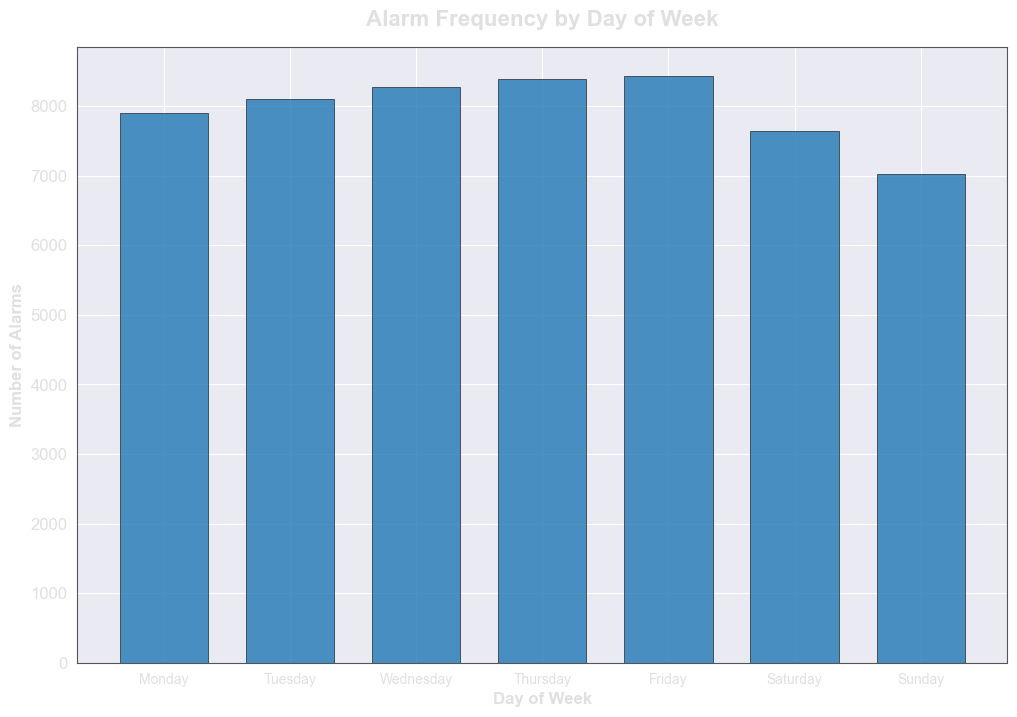

In [186]:
plt.figure(figsize=(12, 8))
day_counts = alarms_copy["weekday"].value_counts().reindex(days_order)
bars = plt.bar(
    day_counts.index,
    day_counts.values,
    width=0.7,
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)
plt.title("Alarm Frequency by Day of Week", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Day of Week", fontsize=12, fontweight='bold')
plt.ylabel("Number of Alarms", fontsize=12, fontweight='bold')
plt.xticks(range(len(days_order)), days_order, fontsize=10);


We observe a relatively consistent level of activity from **Monday through Friday**, with **Wednesday and Thursday** peaking slightly.
As we move into the weekend, there’s a noticeable decline, especially on **Sunday**, which recorded the **lowest number of alarms**.
This reinforces the pattern seen in the heatmap.

### Alarm Duration Distribution by Day of Week

This violin plot shows the distribution of **alarm durations (in minutes)** for each day of the week.

Each "violin" represents the spread and density of alarm durations — wider sections indicate where durations are more concentrated, while the vertical lines show the range.


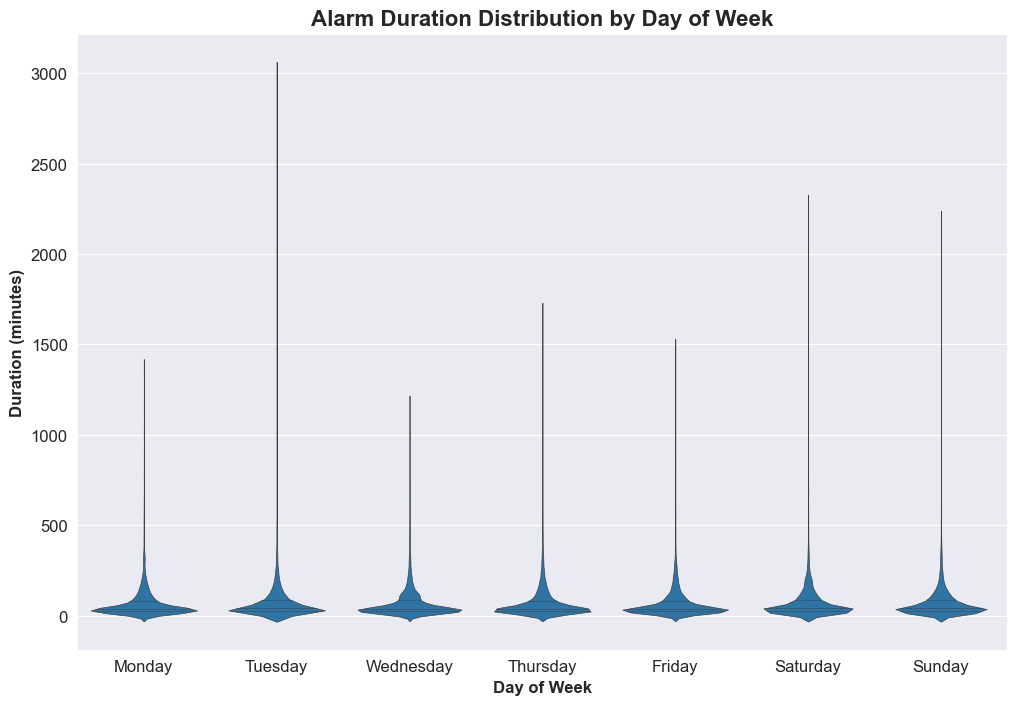

In [193]:
plt.figure(figsize=(12, 8))
sns.violinplot(
    x='weekday',
    y='duration_minutes',
    data=alarms_copy,
    order=days_order,
    inner='quartile',
    linewidth=0.5,
    saturation=0.8
)
plt.title('Alarm Duration Distribution by Day of Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=12, fontweight='bold')
plt.ylabel('Duration (minutes)', fontsize=12, fontweight='bold');

From this plot we observe:
- Most durations are concentrated at the lower end (under 100 minutes), with a long tail of rare but **very long alarms**.
- The distribution shapes are relatively consistent across all days, though **Wednesday and Friday** show slightly more spread toward longer durations.

This view complements earlier weekday frequency plots by showing that even if some days have fewer alarms, their **duration profiles may still vary**.

### Monthly Alarm Count (2022–2025)

This heatmap displays the **monthly total of air alarms** for each year from 2022 to early 2025.

Each cell represents the number of alarms triggered in a specific month, with darker shades indicating higher intensity.

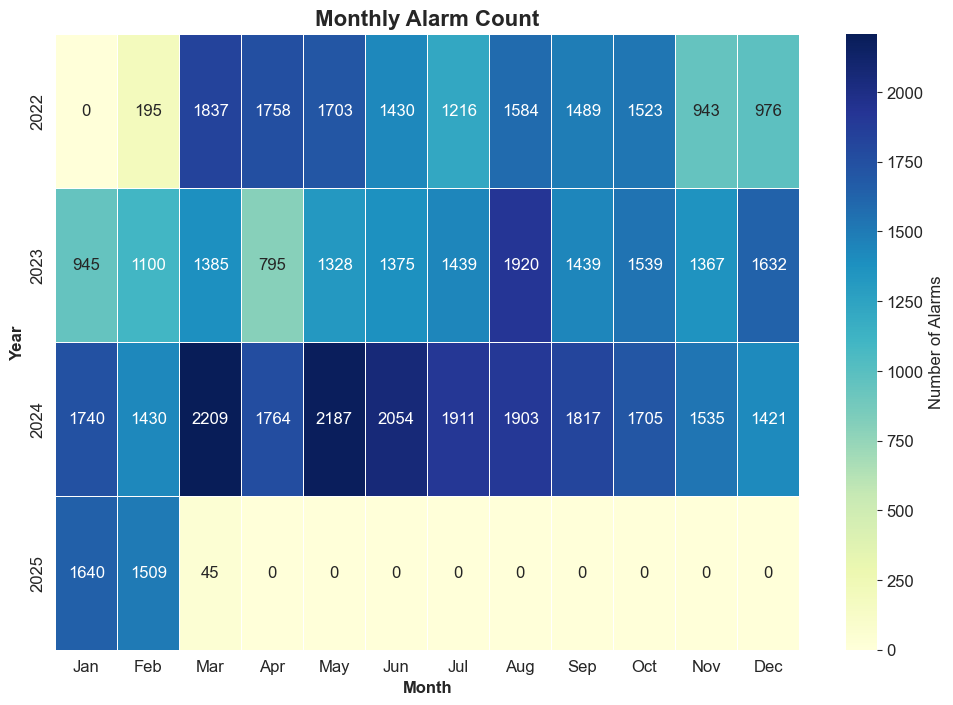

In [198]:
import numpy as np
import calendar

alarms_copy['year'] = alarms_copy['start'].dt.year
alarms_copy['month'] = alarms_copy['start'].dt.month
monthly_data = alarms_copy.groupby(['year', 'month']).agg({
    'id': 'count',
    'duration_minutes': 'mean'
}).reset_index()

pivot_count = monthly_data.pivot_table(index='year', columns='month', values='id',fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_count,
    cmap='YlGnBu',
    annot=True,
    fmt="g",
    linewidths=0.5,
    linecolor='white',
    cbar_kws={'label': 'Number of Alarms'},
)
plt.title('Monthly Alarm Count', fontsize=16,fontweight='bold')
plt.xlabel('Month', fontsize=12,fontweight='bold')
plt.ylabel('Year', fontsize=12,fontweight='bold')
plt.xticks(np.arange(12) + 0.5, [calendar.month_abbr[i] for i in range(1, 13)]);

From the visualization, we observe the following:

- **Alarm counts increased significantly in early 2023 and peaked in 2024**, particularly in **March, May, and June**.
- Alarm levels remained **consistently high across many months in 2024**, with no significant seasonal dip.

This heatmap provides an effective **temporal summary** of escalation and variation in threat frequency over time.

### Conclusion: Part 1 – Alarms Dataset Analysis

In this part, we conducted a detailed exploration of alarm data across multiple dimensions — duration, frequency, temporal patterns, and geographic distribution.

Key takeaways:
- Most alarms last under 100 minutes, though a few rare outliers skew the mean.
- Alarms are most frequently triggered between **10 AM and 2 PM**.
- Weekday patterns are fairly stable, with only a slight decrease in alarms on weekends.
- Alarm **duration distributions** are similar across the week, though some longer alerts appear midweek.

2. Weather

In [83]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608304 entries, 0 to 608303
Data columns (total 65 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   city_latitude         608304 non-null  float64
 1   city_longitude        608304 non-null  float64
 2   city_resolvedAddress  608304 non-null  object 
 3   city_address          608304 non-null  object 
 4   city_timezone         608304 non-null  object 
 5   city_tzoffset         608304 non-null  float64
 6   day_datetime          608304 non-null  object 
 7   day_datetimeEpoch     608304 non-null  int64  
 8   day_tempmax           608304 non-null  float64
 9   day_tempmin           608304 non-null  float64
 10  day_temp              608304 non-null  float64
 11  day_feelslikemax      608304 non-null  float64
 12  day_feelslikemin      608304 non-null  float64
 13  day_feelslike         608304 non-null  float64
 14  day_dew               608304 non-null  float64
 15  

Here we can see a lot of missing data. So all columns should be rechecked separately to decide what to do with missing data, or ,for example hour_preciptype where just 64k from 600k, just delete the column. And again day_datetime is type object so we need to change it.

In [84]:
weather['day_datetime'] = pd.to_datetime(weather['day_datetime'])

In [85]:
start_date = weather['day_datetime'].min()
end_date = weather['day_datetime'].max()
expected_dates = pd.date_range(start=start_date, end=end_date, freq='h')

# Check if any datetimes are missing in the actual data
missing_dates = expected_dates.difference(weather['day_datetime'])

if len(missing_dates) > 0:
    print(f"Missing dates: {missing_dates}")
else:
    print("No missing datetimes.")

# Check if there are any missing values in the 'day_visibility' column
missing_values = weather[weather['day_visibility'].isna()]
if not missing_values.empty:
    print(f"Missing day_visibility values: {missing_values}")
else:
    print("No missing values in 'day_visibility'.")

Missing dates: DatetimeIndex(['2022-02-24 01:00:00', '2022-02-24 02:00:00',
               '2022-02-24 03:00:00', '2022-02-24 04:00:00',
               '2022-02-24 05:00:00', '2022-02-24 06:00:00',
               '2022-02-24 07:00:00', '2022-02-24 08:00:00',
               '2022-02-24 09:00:00', '2022-02-24 10:00:00',
               ...
               '2025-02-28 14:00:00', '2025-02-28 15:00:00',
               '2025-02-28 16:00:00', '2025-02-28 17:00:00',
               '2025-02-28 18:00:00', '2025-02-28 19:00:00',
               '2025-02-28 20:00:00', '2025-02-28 21:00:00',
               '2025-02-28 22:00:00', '2025-02-28 23:00:00'],
              dtype='datetime64[ns]', length=25323, freq=None)
Missing day_visibility values:         city_latitude  city_longitude city_resolvedAddress       city_address  \
203999        51.4937         31.2944    Чернігів, Україна  Chernihiv,Ukraine   
204000        51.4937         31.2944    Чернігів, Україна  Chernihiv,Ukraine   
204001        51.4